# Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

Preparing data

In [12]:
file = 'data/diabetes.csv'

df = pd.read_csv(file)


In [14]:
df.info()
df.describe()
print("Missing Values:",df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [13]:
df.head(3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0


Data is more or less Gaussian, but a Standard scaler should be applied.

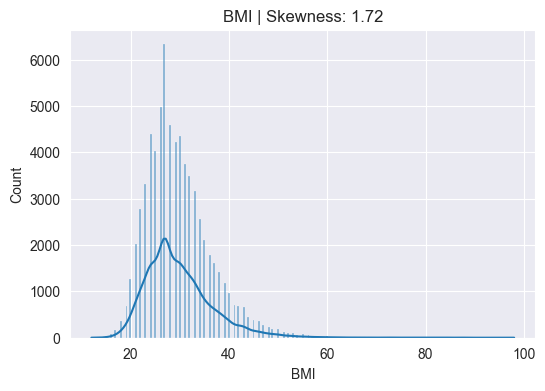

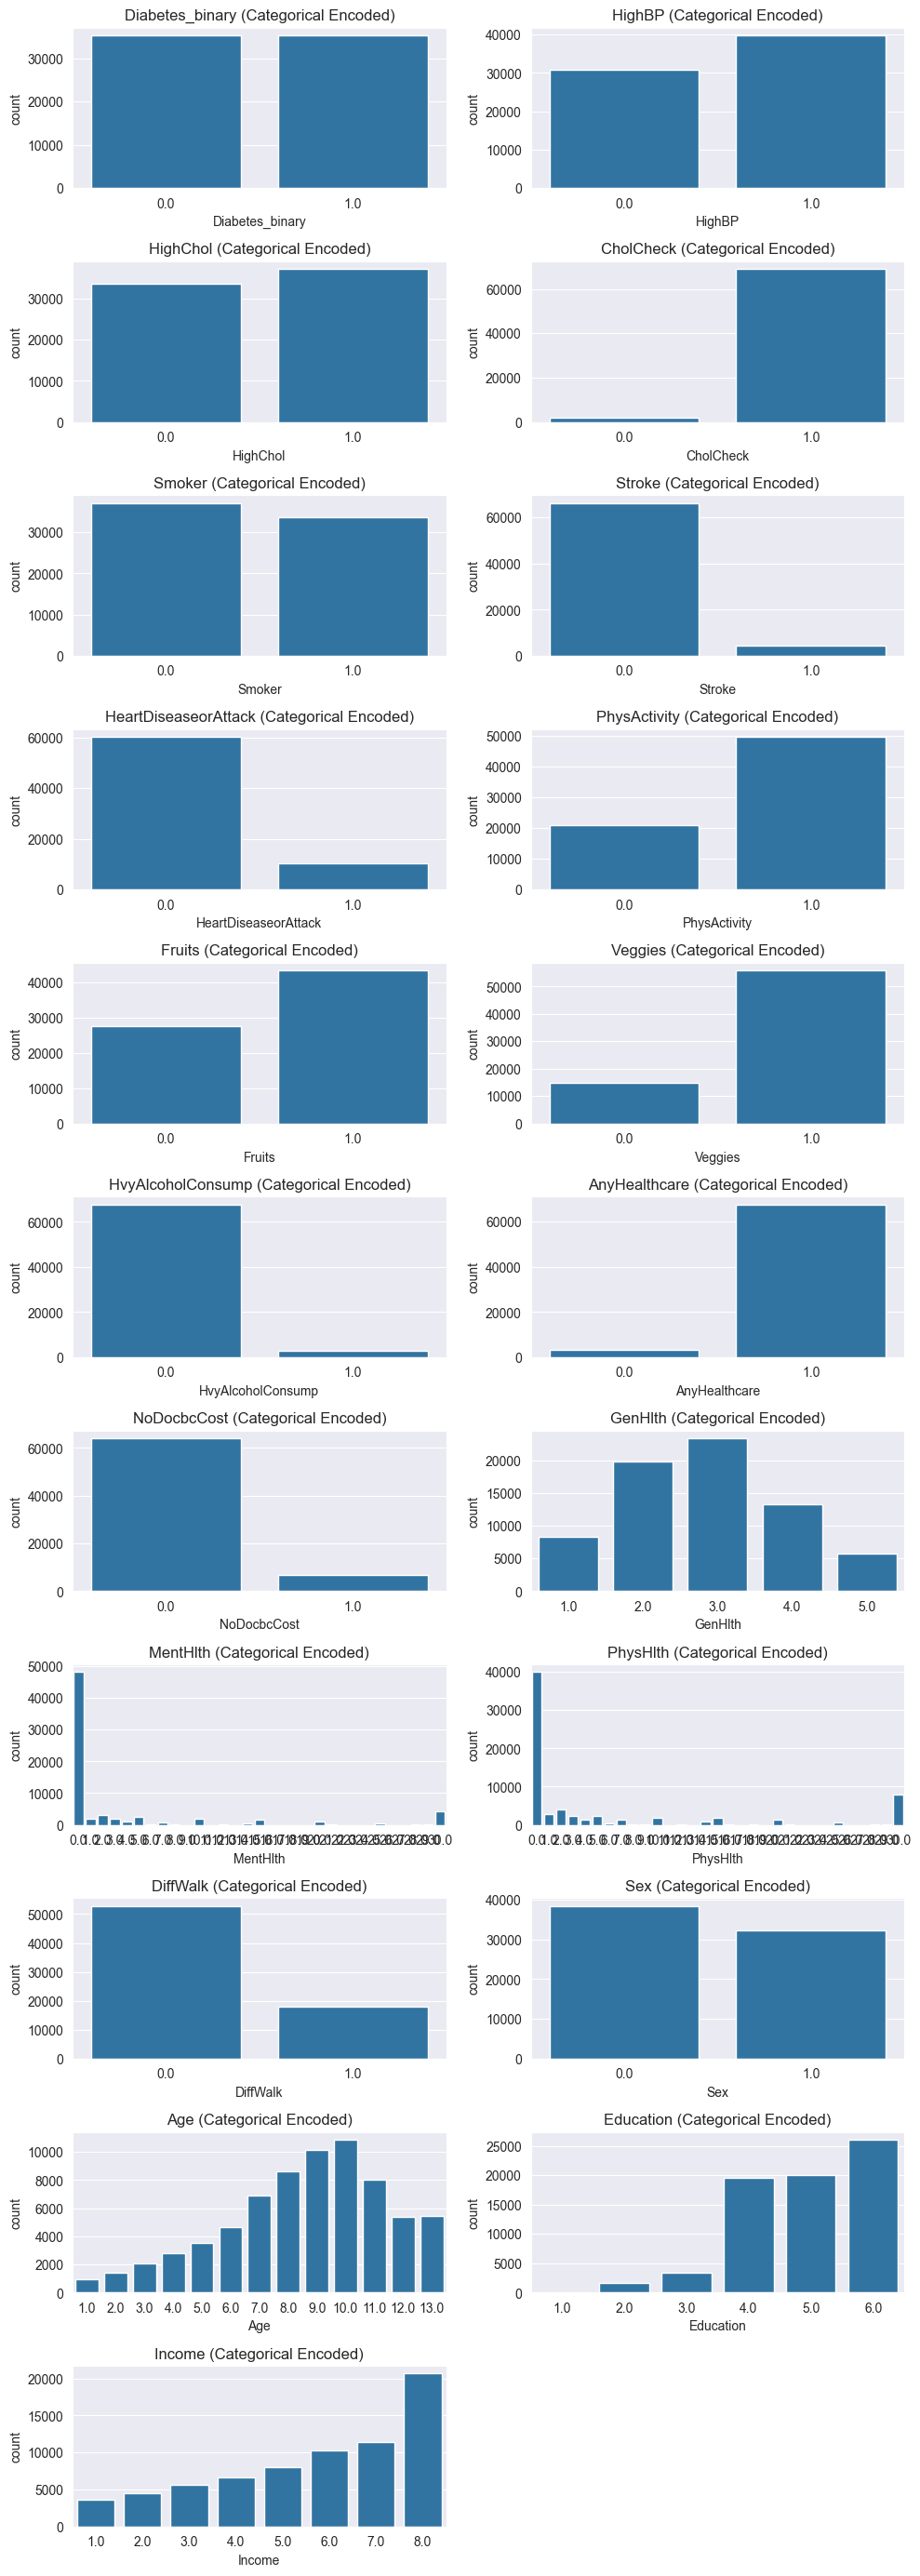

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify variables by type
numeric_true = ["BMI"]   # The actual continuous variable
categorical_numeric = [c for c in df.columns if c != "BMI" and df[c].dtype in ['float64','int64']]

sns.set_style("darkgrid")

# --------------------------------------------------
# HISTOGRAM for BMI (continuous numeric)
# --------------------------------------------------
plt.figure(figsize=(6,4))
sns.histplot(df["BMI"], kde=True)
plt.title(f"BMI | Skewness: {round(df['BMI'].skew(), 2)}")
plt.show()

# --------------------------------------------------
# COUNT PLOTS for encoded categories
# --------------------------------------------------
plt.figure(figsize=(10, len(categorical_numeric) * 2.5))
for idx, feature in enumerate(categorical_numeric, 1):
    plt.subplot(len(categorical_numeric), 2, idx)
    sns.countplot(x=df[feature])
    plt.title(f"{feature} (Categorical Encoded)")
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


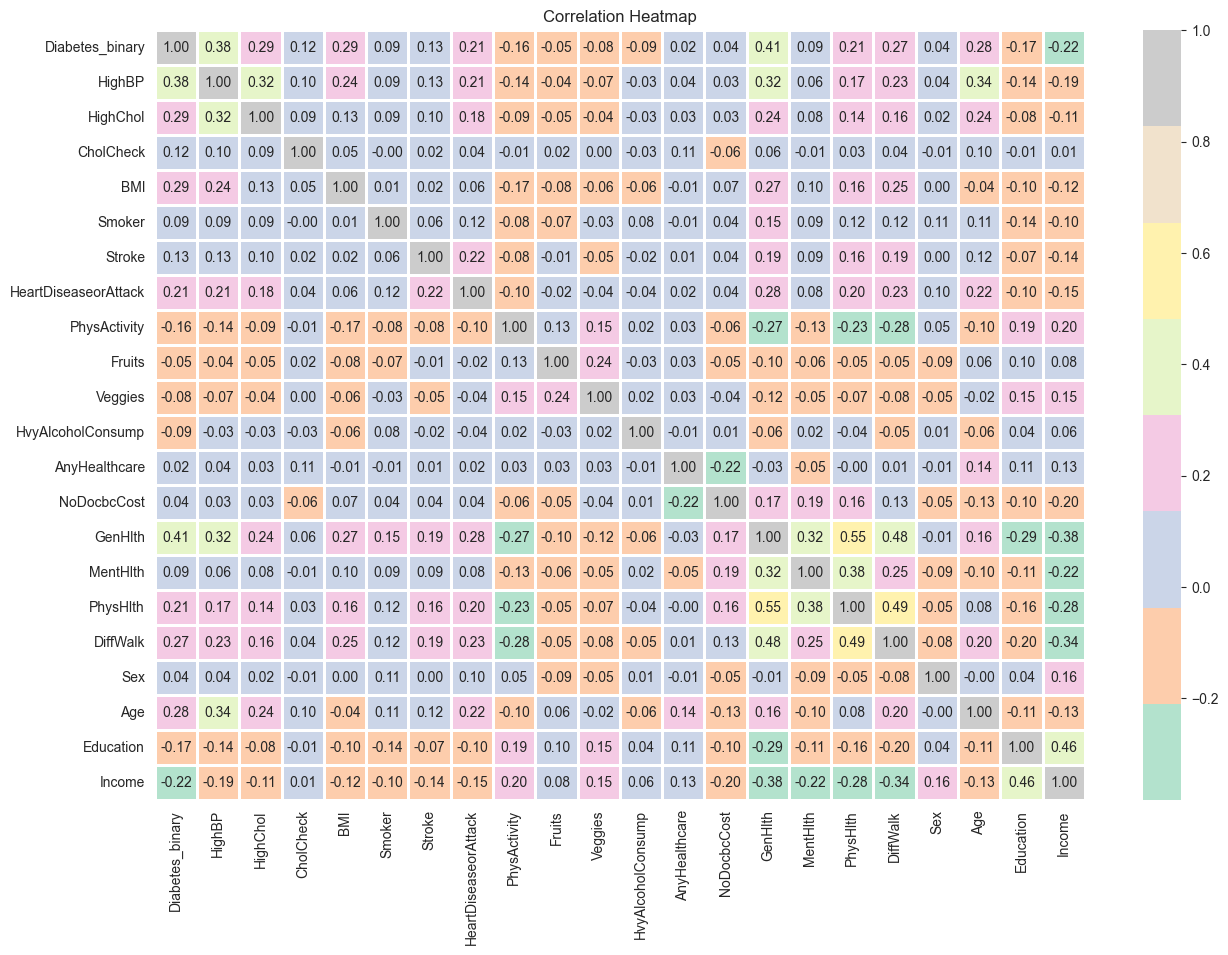

In [16]:
# Correlation map

plt.figure(figsize=(15, 10))

sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

These are the most correlated variables with the target. We choose a threshold of 0.3.

In [17]:
from scipy.stats import pointbiserialr

correlations = {}

for col in df.drop(columns=["Diabetes_binary"]).columns:
    r, p = pointbiserialr(df["Diabetes_binary"], df[col].astype(float))
    correlations[col] = r

pd.Series(correlations)[abs(pd.Series(correlations)) > 0.3].sort_values(ascending=False)


GenHlth    0.407612
HighBP     0.381516
dtype: float64

In [18]:
# 1) Convert all columns to lowercase for consistency
df.columns = df.columns.str.lower()

    # 2) Define the target
target = "diabetes_binary"

    # 3) Categorical variables (convert to category dtype)
categorical_columns = [
        'highbp', 'highchol', 'cholcheck', 'smoker', 'stroke',
        'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
        'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth',
        'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education', 'income'
    ]

for col in categorical_columns:
    df[col] = df[col].astype('category')

    # 4) BMI is numeric
df['bmi'] = df['bmi'].astype(float)

    # 5) Target to int
df[target] = df[target].astype(int)

In [23]:
from scipy.stats import pointbiserialr
import pandas as pd

target = "diabetes_binary"

correlations = {}

for col in df.columns:
    if col != target:
        r, p = pointbiserialr(df[target], df[col])
        correlations[col] = (r, p)

corr_df = pd.DataFrame(correlations, index=["Correlation", "p-value"]).T
corr_df.sort_values(by="Correlation", ascending=False)
corr_df["abs_corr"] = corr_df["Correlation"].abs()
corr_df[corr_df["Correlation"]>0.05].sort_values(by="abs_corr", ascending=False)


,Correlation,p-value,abs_corr
genhlth,0.407612,0.000000e+00,0.407612
highbp,0.381516,0.000000e+00,0.381516
bmi,0.293373,0.000000e+00,0.293373
highchol,0.289213,0.000000e+00,0.289213
age,0.278738,0.000000e+00,0.278738
diffwalk,0.272646,0.000000e+00,0.272646
physhlth,0.213081,0.000000e+00,0.213081
heartdiseaseorattack,0.211523,0.000000e+00,0.211523
stroke,0.125427,9.382035e-246,0.125427
cholcheck,0.115382,4.864796e-208,0.115382


Because:

This dataset is larger (≈70k patients)

It has mixed lifestyle + comorbidities + demographics

Condition (diabetes) has multifactorial causes

Predictors are weakly but jointly informative

Biological systems rarely have correlations >0.5

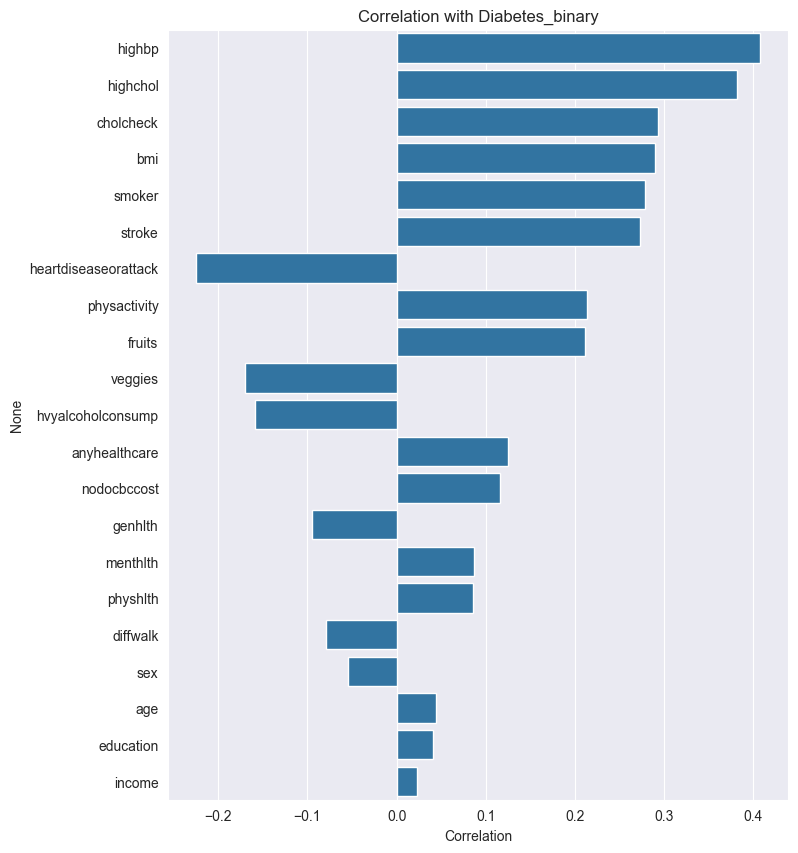

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,10))
sns.barplot(data=corr_df.sort_values("abs_corr", ascending=False), 
            x="Correlation", 
            y=corr_df.index)
plt.title("Correlation with Diabetes_binary")
plt.show()


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import pointbiserialr

def preprocess_diabetes(df, corr_threshold=0.05):

    # 1) Standardize column names
    df.columns = df.columns.str.lower()

    target = "diabetes_binary"

    # 2) Categorical/ordinal variables
    categorical_columns = [
        'highbp', 'highchol', 'cholcheck', 'smoker', 'stroke',
        'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
        'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth',
        'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education', 'income'
    ]

    for col in categorical_columns:
        df[col] = df[col].astype('category')

    # 3) BMI as float
    df['bmi'] = df['bmi'].astype(float)

    # 4) Target as integer
    df[target] = df[target].astype(int)

    # --------------------------------
    # 5) CORRELATION FEATURE SELECTION
    # --------------------------------
    correlations = {}
    for col in df.columns:
        if col != target:
            r, p = pointbiserialr(df[target], df[col])
            correlations[col] = abs(r)

    corr_df = pd.Series(correlations, name="abs_corr").sort_values(ascending=False)

    # Select variables above threshold
    selected_features = corr_df[corr_df >= corr_threshold].index.tolist()
    print(f"Selected {len(selected_features)} features from {len(corr_df)} "
          f"(threshold={corr_threshold})")

    # Filter dataset to selected features + target
    df = df[selected_features + [target]]

    # ----------------------------
    # 6) STRATIFIED TRAIN-TEST SPLIT
    # ----------------------------
    X = df.drop(columns=[target])
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        stratify=y,
        random_state=42
    )

    return {
        "df": df,
        "corr_df": corr_df,
        "selected_features": selected_features,
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    }


In [26]:
dicc = preprocess_diabetes(df)

Selected 18 features from 21 (threshold=0.05)
